In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
from scipy import stats

In [3]:
df= pd.read_csv(r'D:\priya\Steel_industry_data.csv') 
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [4]:
numeric_df = df.select_dtypes(include=[np.number])

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_month'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df = df.drop(['date'], axis=1)

In [6]:

df['CO2(tCO2)'] = df.apply(lambda row: row['Usage_kWh'] * 0.5 if row['CO2(tCO2)'] == 0 else row['CO2(tCO2)'], axis=1)
df['Leading_Current_Reactive_Power_kVarh'] = df['Leading_Current_Reactive_Power_kVarh'].replace(0, df['Leading_Current_Reactive_Power_kVarh'].median())


In [7]:
 from sklearn.preprocessing import LabelEncoder

In [8]:
print(df.columns)

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'hour', 'day_of_month',
       'month', 'year'],
      dtype='object')


In [9]:
label_encoder = LabelEncoder()

df['Day_of_week'] = label_encoder.fit_transform(df['Day_of_week'])
df['Load_Type'] = label_encoder.fit_transform(df['Load_Type'])
df['WeekStatus'] = label_encoder.fit_transform(df['WeekStatus'])

In [10]:
z_scores = np.abs(stats.zscore(numeric_df)) 
df_no_outliers = df[(z_scores < 3).all(axis=1)] 

In [11]:
features = df_no_outliers.drop('CO2(tCO2)', axis=1)

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
pca = PCA(n_components=2)  
pca_features = pca.fit_transform(scaled_features)


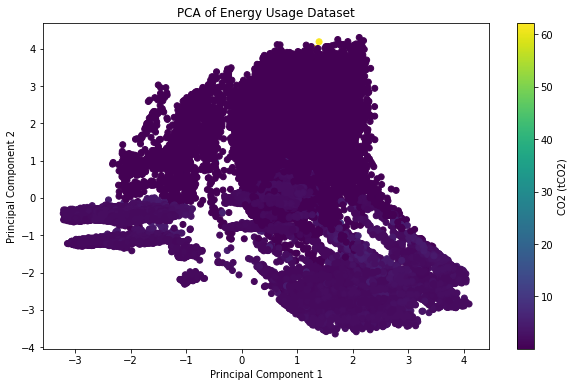

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df_no_outliers['CO2(tCO2)'], cmap='viridis')
plt.colorbar(label='CO2 (tCO2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Energy Usage Dataset')
plt.show()

In [15]:
print(f"Explained variance ratio of each component: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)}")


Explained variance ratio of each component: [0.30135233 0.24020169]
Total explained variance: 0.5415540261378118
